# Task #1 

A template code for training an RBM on H$_2$ data for $r = 1.2$ is shown here. Modify this!

Imports and loading in data:

In [102]:
import numpy as np
import torch
import matplotlib.pyplot as plt

from RBM_helper import RBM

import H2_energy_calculator

r = np.array(range(20,290,5)) / 100.0 
coeff = np.loadtxt("H2_data/H2_coefficients.txt")[:,:]
training_data = []

for i in range(len(r)):
    training_data.append(torch.from_numpy(np.loadtxt("H2_data/R_"+str(r[i])+"_samples.txt")))

Define the RBM:

In [103]:
n_vis = 2
n_hin = 10

rbm = RBM(n_vis, n_hin)

Train the RBM:

In [104]:
epochs = 100 # number of training steps 500
num_samples = 1000 # number of samples to generate from the RBM to calculate the H2 energy 1000
energiesList = []

for i in range(len(r)):
    
    true_energy = H2_energy_calculator.energy_from_freq(training_data[i], coeff[i])
    print("\n--------------------------RBM-" + str(i) + "---------------------------")
    print("\nTrue Energy: %s for r = %s." % (true_energy, r[i]))

    for e in range(1, epochs+1):
        # do one epoch of training
        rbm.train(training_data[i])   

        # now generate samples and calculate the energy
        if e % 25 == 0: #100
            print("\nEpoch: ", e)
            print("Sampling the RBM...")

            # For sampling the RBM, we need to do Gibbs sampling.
            # Initialize the Gibbs sampling chain with init_state as defined below.
            init_state = torch.zeros(num_samples, n_vis)
            RBM_samples = rbm.draw_samples(15, init_state)

            print("Done sampling. Calculating energy...")       

            energies = H2_energy_calculator.energy(RBM_samples, coeff[i], rbm.wavefunction) 
            print("Energy from RBM samples: ", energies.item())
    print("\nFinal RBM Energy: ", energies.item())
    energiesList.append(energies.item())


--------------------------RBM-0---------------------------

True Energy: 0.1442108747311382 for r = 0.2.

Epoch:  25
Sampling the RBM...
Done sampling. Calculating energy...
Energy from RBM samples:  0.18742211847832257

Epoch:  50
Sampling the RBM...
Done sampling. Calculating energy...
Energy from RBM samples:  0.19595117282107424

Epoch:  75
Sampling the RBM...
Done sampling. Calculating energy...
Energy from RBM samples:  0.16916936510725603

Epoch:  100
Sampling the RBM...
Done sampling. Calculating energy...
Energy from RBM samples:  0.1692766641786756

Final RBM Energy:  0.1692766641786756

--------------------------RBM-1---------------------------

True Energy: -0.3239354753254609 for r = 0.25.

Epoch:  25
Sampling the RBM...
Done sampling. Calculating energy...
Energy from RBM samples:  -0.2916803046769401

Epoch:  50
Sampling the RBM...
Done sampling. Calculating energy...
Energy from RBM samples:  -0.2960994839835047

Epoch:  75
Sampling the RBM...
Done sampling. Calculatin


Epoch:  75
Sampling the RBM...
Done sampling. Calculating energy...
Energy from RBM samples:  -1.1113928499304362

Epoch:  100
Sampling the RBM...
Done sampling. Calculating energy...
Energy from RBM samples:  -1.107776756514326

Final RBM Energy:  -1.107776756514326

--------------------------RBM-14---------------------------

True Energy: -1.1285246121015233 for r = 0.9.

Epoch:  25
Sampling the RBM...
Done sampling. Calculating energy...
Energy from RBM samples:  -1.099708446047611

Epoch:  50
Sampling the RBM...
Done sampling. Calculating energy...
Energy from RBM samples:  -1.1040347865066624

Epoch:  75
Sampling the RBM...
Done sampling. Calculating energy...
Energy from RBM samples:  -1.0900012262757615

Epoch:  100
Sampling the RBM...
Done sampling. Calculating energy...
Energy from RBM samples:  -1.1005485258121444

Final RBM Energy:  -1.1005485258121444

--------------------------RBM-15---------------------------

True Energy: -1.11929731061878 for r = 0.95.

Epoch:  25
Samp


Epoch:  25
Sampling the RBM...
Done sampling. Calculating energy...
Energy from RBM samples:  -0.99472997357393

Epoch:  50
Sampling the RBM...
Done sampling. Calculating energy...
Energy from RBM samples:  -0.9986510176241704

Epoch:  75
Sampling the RBM...
Done sampling. Calculating energy...
Energy from RBM samples:  -0.9959937125398803

Epoch:  100
Sampling the RBM...
Done sampling. Calculating energy...
Energy from RBM samples:  -0.9921906316695668

Final RBM Energy:  -0.9921906316695668

--------------------------RBM-28---------------------------

True Energy: -0.9922208295295207 for r = 1.6.

Epoch:  25
Sampling the RBM...
Done sampling. Calculating energy...
Energy from RBM samples:  -0.9927638213950376

Epoch:  50
Sampling the RBM...
Done sampling. Calculating energy...
Energy from RBM samples:  -0.9891683986309221

Epoch:  75
Sampling the RBM...
Done sampling. Calculating energy...
Energy from RBM samples:  -0.9885619424114858

Epoch:  100
Sampling the RBM...
Done sampling. 


Epoch:  100
Sampling the RBM...
Done sampling. Calculating energy...
Energy from RBM samples:  -0.9507868107330326

Final RBM Energy:  -0.9507868107330326

--------------------------RBM-41---------------------------

True Energy: -0.9490056352051295 for r = 2.25.

Epoch:  25
Sampling the RBM...
Done sampling. Calculating energy...
Energy from RBM samples:  -0.9478847221407843

Epoch:  50
Sampling the RBM...
Done sampling. Calculating energy...
Energy from RBM samples:  -0.9495055555630593

Epoch:  75
Sampling the RBM...
Done sampling. Calculating energy...
Energy from RBM samples:  -0.9398426317670959

Epoch:  100
Sampling the RBM...
Done sampling. Calculating energy...
Energy from RBM samples:  -0.9477736350746679

Final RBM Energy:  -0.9477736350746679

--------------------------RBM-42---------------------------

True Energy: -0.9478686468761977 for r = 2.3.

Epoch:  25
Sampling the RBM...
Done sampling. Calculating energy...
Energy from RBM samples:  -0.9481829115604415

Epoch:  50

<IPython.core.display.Javascript object>


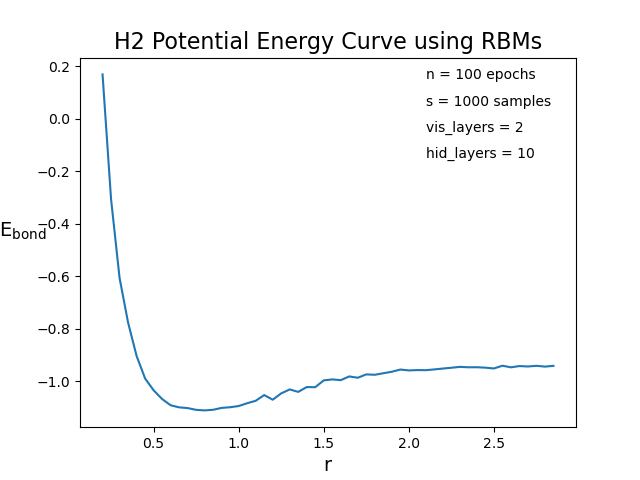

In [139]:
%matplotlib notebook
import matplotlib.pyplot as plt
plt.plot(r,energiesList)
params = {'mathtext.default': 'regular' }  
plt.rcParams.update(params)
plt.xlabel('$r$', fontsize=14)
y = plt.ylabel('$E_{bond}$', fontsize=14, labelpad=10)
y.set_rotation(0)
plt.title('H2 Potential Energy Curve using RBMs', fontsize=16)
plt.text(2.1, 0.15, "n = " + str(epochs))
plt.text(2.1, 0.05, "s = " + str(num_samples))
plt.text(2.1, -0.05, "n_vis = " + str(n_vis))
plt.text(2.1, -0.15, "n_hid = " + str(n_hin))

plt.show()

In [140]:
len(r)

54